In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#### Conduct exploratory data analysis in order to find out
#### where there are outliers or missing values, decide how you will treat them, make sure the dates are formatted correctly,
#### make sure values you think are numerical are being treated as such, etc.


## 1. Reading the Data (4pts)
## (a) Load the dataset using pandas

In [3]:
df = pd.read_csv("rollingsales_brooklyn.csv",  skiprows = 4)

## (b) Display the shape of the data to make sure it was read


In [4]:
df.shape

(23373, 21)

## (c) Display the first 2 rows


In [5]:
df.head(2) 

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART\nMENT\nNUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE\nPRICE,SALE DATE
0,3,,15 CONDOS - 2-10 UNIT RESIDENTIAL,,814,1103,,,342 53RD STREET,,...,0,0,0,0,0,0,2,R1,"$403,572",7/9/13
1,3,,15 CONDOS - 2-10 UNIT RESIDENTIAL,,814,1105,,,342 53RD STREET,,...,0,0,0,0,0,0,2,R1,"$218,010",7/12/13


## (d) Display row 14 to see the field names clearly

In [6]:
df.loc[14]

BOROUGH                                                                      3
NEIGHBORHOOD                                         BATH BEACH               
BUILDING CLASS CATEGORY                                                       
TAX CLASS AT PRESENT                                                         4
BLOCK                                                                     6370
LOT                                                                       1321
EASE-MENT                                                                     
BUILDING CLASS AT PRESENT                                                   RP
ADDRESS                             98 BAY 20TH   STREET                      
APART\nMENT\nNUMBER                                               P1          
ZIP CODE                                                                 11214
RESIDENTIAL UNITS                                                            0
COMMERCIAL UNITS                                    

## 2. Reformatting column labels (4pts)
## (a) Convert the column names to lower case

In [7]:
df.columns = df.columns.str.lower()
df.columns

Index(['borough', 'neighborhood', 'building class category',
       'tax class at present', 'block', 'lot', 'ease-ment',
       'building class at present', 'address', 'apart\nment\nnumber',
       'zip code', 'residential units', 'commercial units', 'total units',
       'land square feet', 'gross square feet', 'year built',
       'tax class at time of sale', 'building class at time of sale',
       'sale\nprice', 'sale date'],
      dtype='object')

## (b) Replace the ‘\n’ in the column names with space


In [8]:
df.columns = df.columns.str.replace('\n', ' ')

## (c) Replace the spaces in the column names with underscores


In [9]:
df.columns = df.columns.str.replace(' ', '_')

## (d) Display row 14 again to see the change in the field names

In [10]:
df.loc[14]

borough                                                                      3
neighborhood                                         BATH BEACH               
building_class_category                                                       
tax_class_at_present                                                         4
block                                                                     6370
lot                                                                       1321
ease-ment                                                                     
building_class_at_present                                                   RP
address                             98 BAY 20TH   STREET                      
apart_ment_number                                                 P1          
zip_code                                                                 11214
residential_units                                                            0
commercial_units                                    

## 3. Convert the field “sale_price” to numeric (it is currently formatted as currency which cannot be used in calculations.)
(Hints: There is a to_numeric function. You will first need to remove the commas and dollar signs. See slide 33 or
35 of the Pandas preprocessing tutorial.) 

In [11]:
df['sale_price'] = pd.to_numeric(df['sale_price'].replace({'\$': '', ',': ''}, regex=True))

## 4. Display a count of missing sale prices (those set to ‘0s’) (1pt)

In [12]:
df['sale_price'].value_counts()

0         8791
10         241
700000     138
650000     129
300000     120
          ... 
737000       1
751000       1
498942       1
599500       1
354969       1
Name: sale_price, Length: 3318, dtype: int64

In [13]:
(df['sale_price'] == 0).sum()

8791

## 5. Convert “land_square_feet” to numeric (it’s currently a formatted string which cannot be used in calculations) (1pt)

In [14]:
df['land_square_feet'] = pd.to_numeric(df['land_square_feet'].replace({',': ''}, regex=True))

## 6. Convert “gross_square_feet” to numeric, “sale_date” to datetime, “year_built” to numeric (int32), and “zip_code” to string (4pts)

In [15]:
df['gross_square_feet'] = pd.to_numeric(df['gross_square_feet'].replace({',': ''}, regex=True))
df['year_built'] = df['year_built'].astype(np.int32)
df['sale_date'] = pd.to_datetime(df['sale_date'])
df['zip_code'] = df['zip_code'].astype(str)

## 7. Change EAST/WEST to E/W for each address (2pts)

In [16]:
df['address'] = df['address'].replace({'EAST': 'E', 'WEST': 'W'}, regex=True)

## 8. Change STREET/AVENUE to ST/AVE for each address (2pts)

In [17]:
df['address'] = df['address'].replace({'STREET': 'ST', 'AVENUE': 'AVE'}, regex=True)

## 9. Plot the following histograms: (4pts)
• sale price by counts

• sale price>0

• gross sqft where sale price == 0

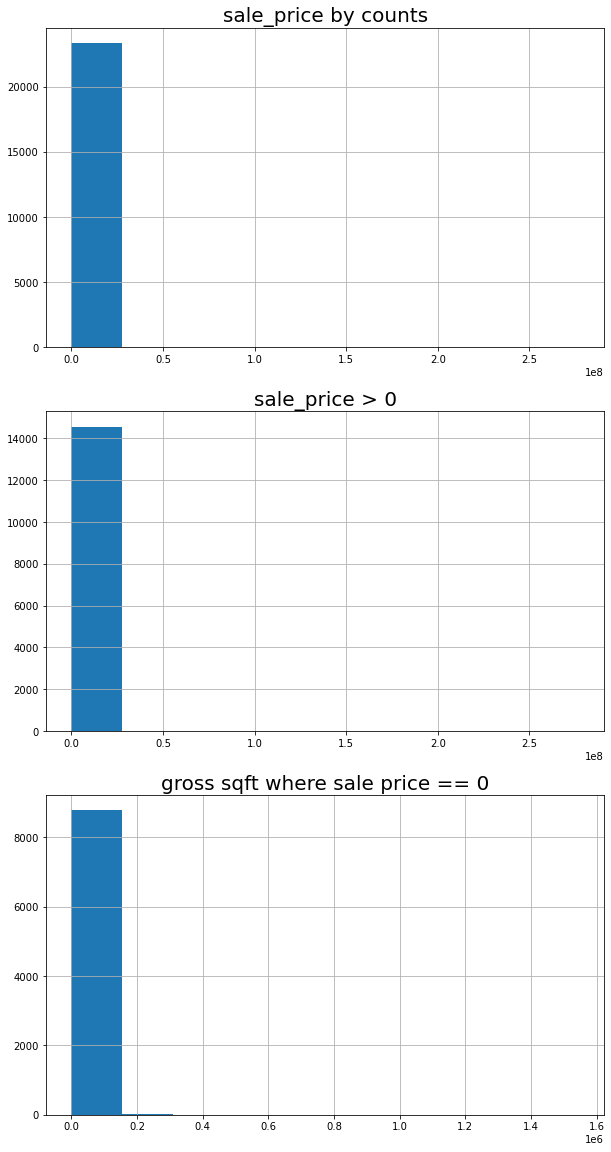

In [18]:
%matplotlib inline


price = df[df['sale_price']>0]
zero_price= df[df['sale_price']==0]


fig = plt.figure(figsize = (10,20))

ax1 = fig.add_subplot(311)
ax1.set_title('sale_price by counts', fontsize=20)
df['sale_price'].hist(ax=ax1)

ax2 = fig.add_subplot(312)
ax2.set_title('sale_price > 0', fontsize=20)
price['sale_price'].hist(ax=ax2)

ax3 = fig.add_subplot(313)
ax3.set_title('gross sqft where sale price == 0', fontsize=20)
zero_price['gross_square_feet'].hist(ax=ax3);



## 10. Filter the data by family homes (i.e., return a subset of rows in a temp variable where the "building_class_category" contains "FAMILY" ) (2pts)

In [19]:
family_homes = df[df['building_class_category'].str.contains('FAMILY')]
family_homes.head()

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apart_ment_number,...,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
25,3,BATH BEACH,01 ONE FAMILY HOMES,1,6363,23,,A9,8641 16TH AVE,,...,1,0,1,2058,1492,1930,1,A9,560000,2013-06-06
26,3,BATH BEACH,01 ONE FAMILY HOMES,1,6366,69,,A1,8658 BAY 16TH ST,,...,1,0,1,4833,1724,1930,1,A1,860000,2012-12-18
27,3,BATH BEACH,01 ONE FAMILY HOMES,1,6371,21,,A9,73 BAY 20TH ST,,...,1,0,1,2417,2132,1930,1,A9,508000,2012-08-24
28,3,BATH BEACH,01 ONE FAMILY HOMES,1,6378,64,,A1,56 BAY 28TH ST,,...,1,0,1,3867,1704,1899,1,A1,600000,2013-06-18
29,3,BATH BEACH,01 ONE FAMILY HOMES,1,6379,42,,S1,2142 86TH ST,,...,1,1,2,1600,2640,1925,1,S1,0,2012-12-14


## 11. Create a log scatter plot of “gross sqft” vs “sale price” for family homes (2pts)

/Users/Mjhon/miniforge3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


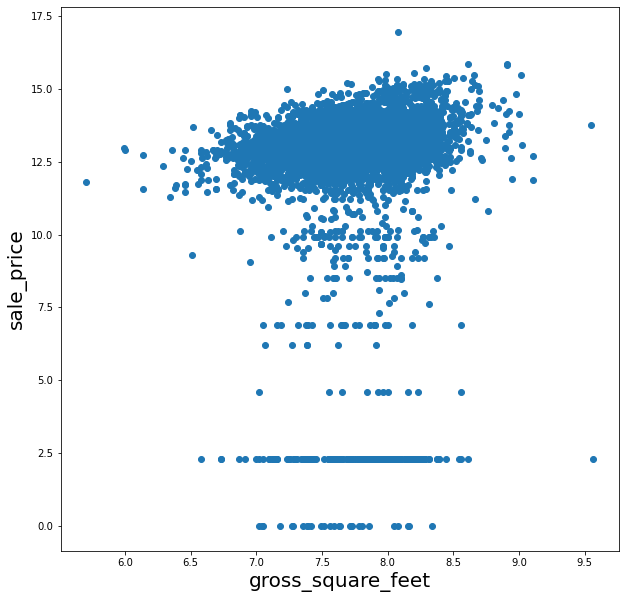

In [20]:
fig = plt.figure(figsize = (10,10));
x = np.log(family_homes['gross_square_feet']);
y = np.log(family_homes['sale_price']);
plt.xlabel('gross_square_feet', fontsize=20);
plt.ylabel('sale_price', fontsize=20);
plt.scatter(x,y);

## 12. Return a subset of family homes where sale price<100000. How many homes fall in this category? (2pts)

4745

In [21]:
# price_condition = family_homes['sale_price'] < 100000
subset = family_homes[family_homes['sale_price'] < 100000]
subset['sale_price'].value_counts().values.sum()
# subset.head()

4745

## 13. Return a count of the sale prices (Notice that some homes were sold for a $1, etc. These seem to be outliers) (1pt)

In [22]:
subset['sale_price'].value_counts().sort_index()[:10]

0       4306
1         27
10       174
100       10
500        6
1000      22
1500       1
2000       1
2094       1
2164       1
Name: sale_price, dtype: int64

## 14. Remove outliers of sales with sale price <= 5 (2pts)

In [23]:
outliers_removed = subset[subset['sale_price'] > 5]
outliers_removed['sale_price'].value_counts().sum()

412

## 15. With the outliers removed, create a plot of “gross sqft” vs “sale price” (2pts)

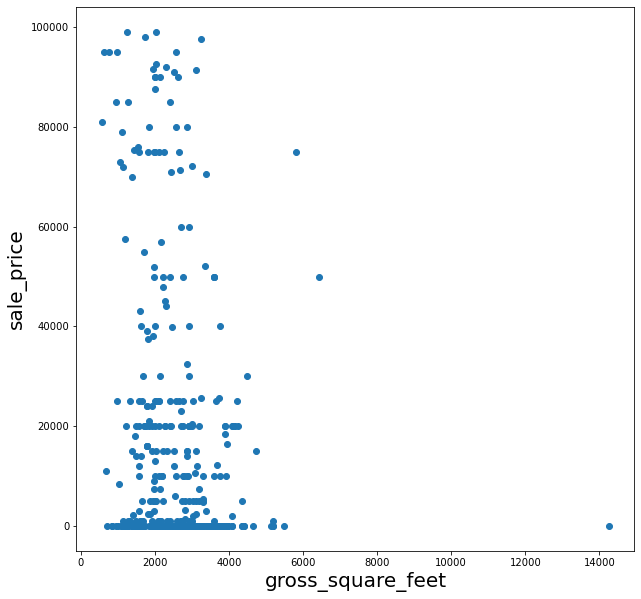

In [24]:
fig = plt.figure(figsize = (10,10));
x_removed = outliers_removed['gross_square_feet'];
y_removed = outliers_removed['sale_price'];

plt.xlabel('gross_square_feet', fontsize=20);
plt.ylabel('sale_price', fontsize=20);
plt.scatter(x_removed,y_removed);

## 16. Create a plot of the top 10 home sales for family homes. (5pts)

In [26]:
# topvalues = top['sale_price'].value_counts().nlargest(10).index
# topvalues
# topten = top[top['sale_price'].isin(topvalues)]
# topten

In [25]:
print(family_homes['sale_price'].value_counts().nlargest(10))
top = family_homes[family_homes['sale_price'] > 0]

0         4306
10         174
600000      82
700000      77
650000      75
300000      71
800000      61
550000      61
450000      59
200000      59
Name: sale_price, dtype: int64


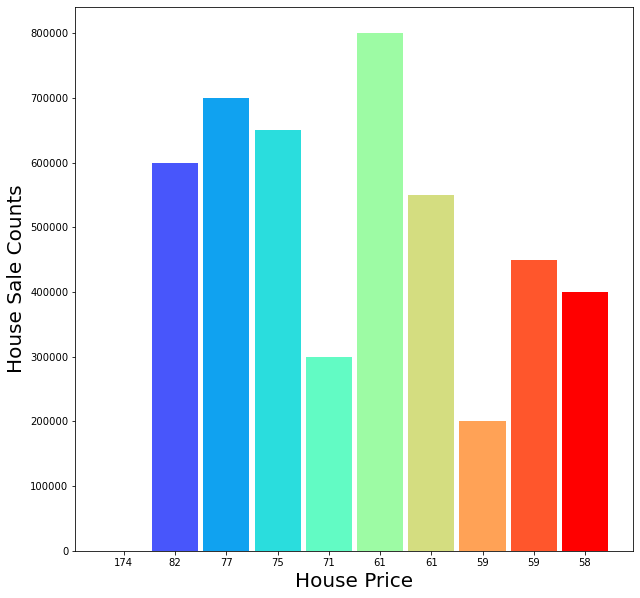

In [27]:
# outliers_removed 

fig = plt.figure(figsize = (10,10));

color = plt.cm.rainbow(np.linspace(0, 1, 10))

plt.xlabel('House Price', fontsize=20);
plt.ylabel('House Sale Counts', fontsize=20);


index = np.arange(10)  

# std = outliers_removed['sale_price'].std()
# # mean = topten['sale_price'].mstd)
# print(std)

y = top['sale_price'].value_counts()[:10].index
x = top['sale_price'].value_counts()[:10].values

# plt.bar(index, y, yerr=std, width=0.90, color=color)
plt.bar(index, y, width=0.90, color=color)
plt.xticks(index, x);
plt.show()
# outliers_removed['sale_price'].value_counts()[:10].plot(kind='bar', rot=0);

## MEME TIME / SPAGHETTI CODE 
NO LOOPS JUST A LOT OF BROADCASTING PAIN

In [28]:
def add_border(img, color):
    h, w, c = img.shape
    border = 10
    new_img_array = np.full((h+2*border, w+2*border, c), color) 
    new_img_array[border:-border, border:-border] = img
    return new_img_array

In [ ]:
from PIL import Image, ImageDraw, ImageFont
 
file = 'spaghetticode.png'
img = Image.open(file)
img = np.array(img)

# print(img.shape)
magic = img[50:335,45:335]
# print(magic.shape)
spaghetti = img[50:335, 370:660]
# img.save('pil_red.png')
plt.figure(figsize = (10,10))

#Ignore this...wanted to add rainbow to each tiles but can't use loops :(
border_color = (plt.cm.rainbow(np.linspace(0, 1, 9))[:,:3] * 255).astype(np.uint8)

border = add_border(magic, border_color[0])
border2 = add_border(spaghetti, border_color[3])

new = np.tile(border, (3,3,1))
h,w = border2.shape[:2]
new[h:-h, w:-w] = border2


meme = np.full((100+new.shape[0], new.shape[1], new.shape[2]), (255,255,255), dtype = new.dtype) 
meme[100:, :] = new

draw = Image.fromarray(meme)
fnt = ImageFont.truetype('/Library/Fonts/Arial.ttf', 40)
d = ImageDraw.Draw(draw)
d.text((150,25), 'The truth inside software application', font=fnt, fill=(0, 0, 0))
d.text((340,525), 'spaghetti code',font=fnt, fill=(255, 255, 255))

plt.imshow(draw);